<h1 align='center'><u>Series de Fourier con Sympy</u></h1>

<br><p><b style="text-transform:uppercase">Seminario:</b> Aplicación a Electrotecnia.</p>
<p><b style="text-transform:uppercase">Grupo:</b> 11.</p>
<p><b style="text-transform:uppercase">Integrantes:</b> Díaz Gastón Alejandro, Duarte Guillermo Daniel, Tagliani Pedro y Viscarra Hernández Daiana Belén.</p><br>

<h3>Librerías a utilizar:</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display

<h3>Representación de función a analizar:</h3>

Función a analizar:


⎧  2⋅x    for x > -2 ∧ x < 0
⎨                           
⎩4 - 2⋅x  for x > 0 ∧ x < 2 

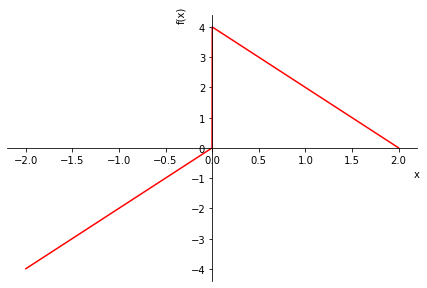

In [2]:
sym.init_printing(use_latex='mathjax') 
# sym.init_printing(): This will automatically enable the best printer available in your environment

x=sym.symbols('x')
n=sym.Symbol('n', integer=True, nonnegative=True, nonzero=True)

f=sym.Piecewise((2*x,sym.And(x>-2,x<0)),(-2*x+4,sym.And(x>0,x<2))) # Con sym.And() establezco las dos condiciones

print('Función a analizar:')
display(f)
# https://stackoverflow.com/questions/20979993/how-to-pretty-print-in-ipython-notebook-via-sympy

T=4
L=T/2
disc=[-2,0,2]

# https://docs.sympy.org/latest/modules/plotting.html
plot1=sym.plot(f,ylabel='f(x)',show=False,line_color='red')
plot1.show()

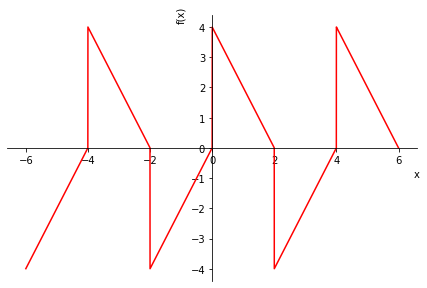

In [3]:
# Expreso a la función f(x) como f(x)=f(x+4)

f_peri=sym.Piecewise((2*x,sym.And(x>-2,x<0)),(-2*x+4,sym.And(x>0,x<2)),(2*x+2*T,sym.And(x>-2-T,x<0-T)),(-2*x+4-2*T,sym.And(x>0-T,x<2-T)),(2*x-2*T,sym.And(x>-2+T,x<0+T)),(-2*x+4+2*T,sym.And(x>0+T,x<2+T)))
f_periodic_plot=sym.plot(f_peri, line_color='red',show=False,ylabel='f(x)',xlabel='x')
f_periodic_plot.show()

<h3>Cálculo de la serie de Fourier:</h3>

Coeficiente a0 =


0


Coeficiente an =


    ⎛        n⎞
8.0⋅⎝1 - (-1) ⎠
───────────────
      2  2     
     π ⋅n      


Coeficiente bn =


    ⎛        n⎞
4.0⋅⎝1 - (-1) ⎠
───────────────
      π⋅n      


Serie de Fourier (Cantidad de funciones armónicas = 20):


  20                                                                     
_____                                                                    
╲                                                                        
 ╲                                                                       
  ╲   ⎛⎛          n        ⎞              ⎛          n      ⎞           ⎞
   ╲  ⎜⎜  8.0⋅(-1)     8.0 ⎟    ⎛π⋅n⋅x⎞   ⎜  4.0⋅(-1)    4.0⎟    ⎛π⋅n⋅x⎞⎟
   ╱  ⎜⎜- ───────── + ─────⎟⋅cos⎜─────⎟ + ⎜- ───────── + ───⎟⋅sin⎜─────⎟⎟
  ╱   ⎜⎜     2  2      2  2⎟    ⎝  2  ⎠   ⎝     π⋅n      π⋅n⎠    ⎝  2  ⎠⎟
 ╱    ⎝⎝    π ⋅n      π ⋅n ⎠                                            ⎠
╱                                                                        
‾‾‾‾‾                                                                    
n = 1                                                                    

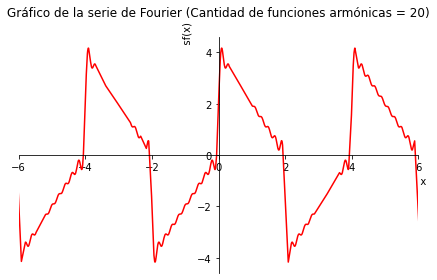

In [4]:
a0= 1/L*(sym.integrate(2*x,(x,disc[0],disc[1])) + sym.integrate(-2*x+4,(x,disc[1],disc[2])))

an= 1/L*(sym.integrate(2*x * sym.cos(sym.pi*n*x/L),(x,disc[0],disc[1])) + sym.integrate((-2*x+4) * sym.cos(sym.pi*n*x/L),(x,disc[1],disc[2])))

bn= 1/L*(sym.integrate(2*x * sym.sin(sym.pi*n*x/L),(x,disc[0],disc[1])) + sym.integrate((-2*x+4) * sym.sin(sym.pi*n*x/L),(x,disc[1],disc[2])))

print('Coeficiente a0 =')
display(a0)

print('\nCoeficiente an =')
display(sym.simplify(an))

print('\nCoeficiente bn =')
display(sym.simplify(bn))

cant_func=20

serie_fourier= a0 + sym.concrete.summations.Sum(an * sym.cos(sym.pi*n*x/L) + bn * sym.sin(sym.pi*n*x/L),(n,1,cant_func))

print(f'\nSerie de Fourier (Cantidad de funciones armónicas = {cant_func}):')
display(serie_fourier)

serie_fourier_eval=serie_fourier.doit()
fourier_plot=sym.plot(serie_fourier_eval,xlim=(-6,6), line_color='red',show=False,title=f'Gráfico de la serie de Fourier (Cantidad de funciones armónicas = {cant_func})\n',ylabel='   sf(x)',xlabel='   x')
# fourier_plot.extend(f_periodic_plot)
fourier_plot.show()

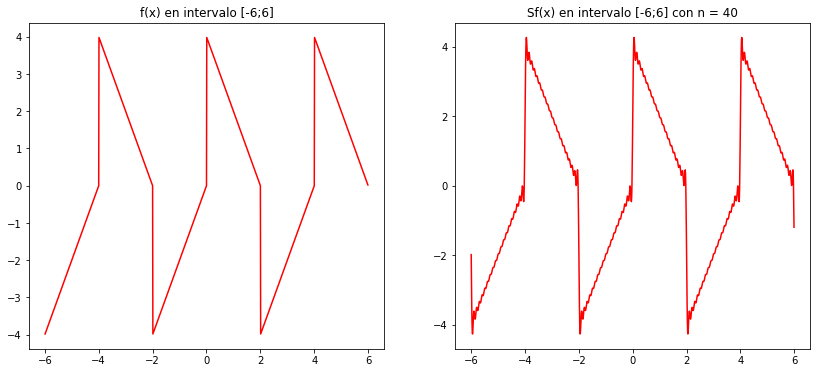

In [5]:
x_values=np.arange(-6,6,0.01)

f_peri_numpy=sym.lambdify(x,f_peri,'numpy')
f_pe=f_peri_numpy(x_values)
sf_numpy=sym.lambdify(x,a0 + sym.concrete.summations.Sum(sym.simplify(an * sym.cos(sym.pi*n*x/L)) + bn * sym.sin(sym.pi*n*x/L),(n,1,40)).doit(),'numpy')
sf=sf_numpy(x_values)

fig=plt.figure(figsize=(14,6))

ax=fig.add_subplot(1,2,1)
ax.plot(x_values,f_pe,c='red')
ax.set_title('f(x) en intervalo [-6;6]')

ax2=fig.add_subplot(1,2,2)
ax2.plot(x_values,sf,c='red')
ax2.set_title('Sf(x) en intervalo [-6;6] con n = 40')

# plt.savefig('Gráficos.jpg')

plt.show()

<h3>Comparación de series de Fourier variando la cantidad de funciones armónicas: </h3>

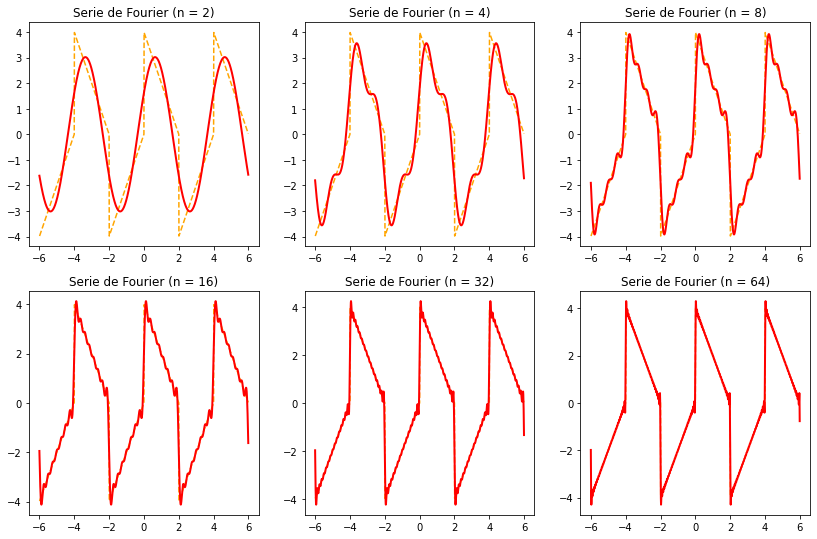

In [6]:
x_values=np.arange(-6,6,0.01)
i=2

f_peri_numpy=sym.lambdify(x,f_peri,'numpy')
f_pe=f_peri_numpy(x_values)

fig=plt.figure(figsize=(14,14))

for j in range(6):
    # https://docs.sympy.org/latest/tutorial/basic_operations.html
    sf_numpy=sym.lambdify(x,a0 + sym.concrete.summations.Sum(sym.simplify(an * sym.cos(sym.pi*n*x/L)) + bn * sym.sin(sym.pi*n*x/L),(n,1,i)).doit(),'numpy')
    sf=sf_numpy(x_values)

    plt.subplot(3,3,j+1)
    plt.plot(x_values,f_pe,c='orange',linestyle='dashed')
    plt.plot(x_values,sf,c='red',linewidth=2)
    plt.title('Serie de Fourier (n = '+str(i)+')')

    i*=2

plt.show()

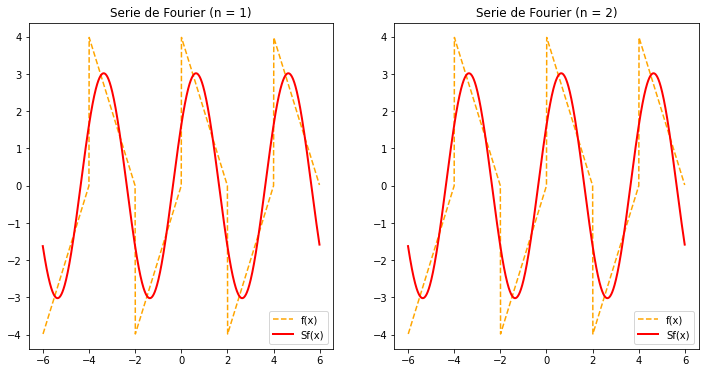

In [7]:
x_values=np.arange(-6,6,0.01)
i=1

f_peri_numpy=sym.lambdify(x,f_peri,'numpy')
f_pe=f_peri_numpy(x_values)

fig=plt.figure(figsize=(12,6))

for j in range(2):
    sf_numpy=sym.lambdify(x,a0 + sym.concrete.summations.Sum(sym.simplify(an * sym.cos(sym.pi*n*x/L)) + bn * sym.sin(sym.pi*n*x/L),(n,1,i)).doit(),'numpy')
    sf=sf_numpy(x_values)

    plt.subplot(1,2,j+1)
    plt.plot(x_values,f_pe,c='orange',linestyle='dashed',label='f(x)')
    plt.plot(x_values,sf,c='red',linewidth=2,label='Sf(x)')
    plt.title('Serie de Fourier (n = '+str(i)+')')
    plt.legend(loc='best')

    i+=1

# plt.savefig('Serie de Fourier 1.jpg')
plt.show()

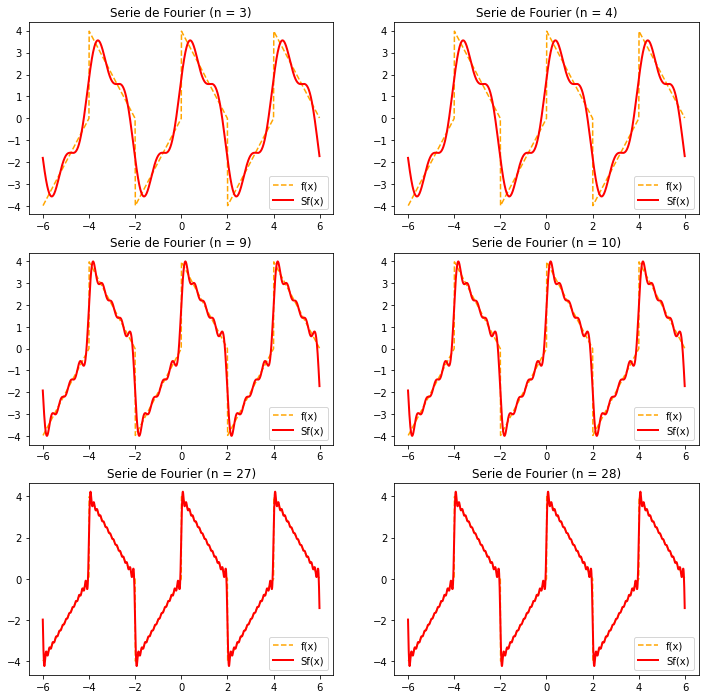

In [8]:
x_values=np.arange(-6,6,0.01)
i=3

f_peri_numpy=sym.lambdify(x,f_peri,'numpy')
f_pe=f_peri_numpy(x_values)

fig=plt.figure(figsize=(12,12))

for j in range(6):
    sf_numpy=sym.lambdify(x,a0 + sym.concrete.summations.Sum(sym.simplify(an * sym.cos(sym.pi*n*x/L)) + bn * sym.sin(sym.pi*n*x/L),(n,1,i)).doit(),'numpy')
    sf=sf_numpy(x_values)

    plt.subplot(3,2,j+1)
    plt.plot(x_values,f_pe,c='orange',linestyle='dashed',label='f(x)')
    plt.plot(x_values,sf,c='red',linewidth=2,label='Sf(x)')
    plt.title('Serie de Fourier (n = '+str(i)+')')
    plt.legend(loc='best')
    
    if (i % 2 == 0):
        i=(i-1)*3
    else:
        i+=1

# plt.savefig('Serie de Fourier 2.jpg')
plt.show()